In [1]:
from captum.attr import NeuronGradient
from receptive_fields.util.experiment_setup import open_experiment
from receptive_fields.util.modules import NamedFromSequential
import torch
from torchinfo import summary
from util.activation_visualization import rescaleZeroOne
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using", device)

Using cuda


In [2]:
model_path = "../models/areadne_submission/pool_large"
model, train_data= open_experiment(model_path)

Files already downloaded and verified


In [3]:
seq_model = NamedFromSequential(model.get_sequential())

In [4]:
seq_model

NamedFromSequential(
  (Conv2d_0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1))
  (ELU_0): ELU(alpha=1.0, inplace=True)
  (AvgPool2d_0): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (Conv2d_1): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1))
  (ELU_1): ELU(alpha=1.0, inplace=True)
  (AvgPool2d_1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (Conv2d_2): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1))
  (ELU_2): ELU(alpha=1.0, inplace=True)
  (AvgPool2d_2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (Conv2d_3): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1))
  (ELU_3): ELU(alpha=1.0, inplace=True)
  (AvgPool2d_3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (Flatten_0): Flatten(start_dim=1, end_dim=-1)
  (Linear_0): Linear(in_features=128, out_features=128, bias=True)
  (ELU_4): ELU(alpha=1.0, inplace=True)
  (Linear_1): Linear(in_features=128, out_features=128, bias=True)
  (ELU_5): ELU(alpha=1.0, inplace=True)
  (Linear_2): Linear(in_features=128, out_features

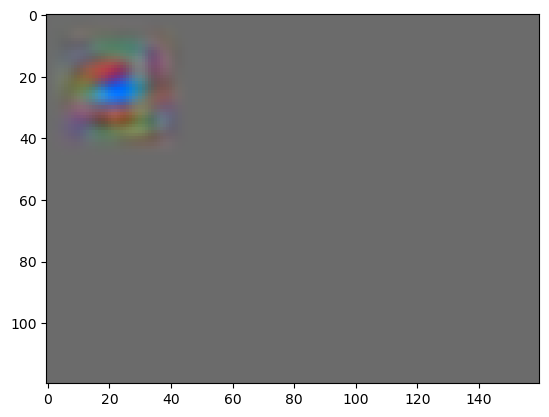

In [7]:
grad = NeuronGradient(seq_model, seq_model.ELU_2)
rf = grad.attribute(torch.zeros(1,3,*model.img_size[::-1], requires_grad=True), neuron_selector=(1,0,0))
plt.imshow(rescaleZeroOne(rf[0].movedim(0,2).detach().cpu()))